CONTINUACAO DO CURSO

In [ ]:
# bibliotecas utilizadas
import cv2 #OpenCV
from google.colab.patches import cv2_imshow
from google.colab import drive
import dlib
from PIL import Image
import numpy as np
import zipfile
from sklearn.metrics import accuracy_score
import os
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import save_model
tf.__version__ #versao do tensorflow

'2.15.0'

In [ ]:
#caso de problema com a versao do tensorflow
#!pip install tensorflow == 2.6.0 #versao usada no curso

In [ ]:
# drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Redes Neurais

> Neuronio Artificial - possui entradas, pesos, passa por uma funcao soma (somatorio das entradas*pesos) e por fim uma funcao de ativacao.

> a Taxa de aprendizagem serve para que rede va aprendendo a cada erro dela para ajuste dos pesos.

> O perceptron que eh o uso de um neoronio pode ser utilizado para problemas linarmente separaveis.

> MLP - multilayer perceptron - varias camadas com camadas ocultas.

> Apos a primeira rodada eh feita uma coleta do erro. A forma mais simples eh a subtracao da respostaCorreta - respostaCalculada. Por fim, soma-se os valores de erros de todos os registros e faz-se uma media absoluta (nao considera o sinal).

> Quanto menor o erro, melhor os pesos estao se adaptando.

> Gradiente ("bolinha em uma tigela"). Pense no erro como uma tigela e a bolinha como os resultados de cada epoca. A ideia eh chegar ao minimo desse erro, ou seja, o fundo da tigela. O gradiente eh calculado para saber quanto ajustar os pesos. O calculo da derivada eh utilizado para essa minimizacao.

> Minimizar a loss function eh o calculo da para encontrar o minimo do gradiente.

> A atualizacao dos pesos eh feita: Funcao da ativacao -> Derivada dessa funcao -> Delta -> gradiente.

> Esse delta eh calculado em duas etapas, considerando para cada registro:
* 1. o primeiro eh o calculo do DeltaSaida (Erro do registro * Derivada da funcao de ativacao da saida).
* 2. O segunda passo eh o calculo do Delta da Camada Escondida (Derivada funcao de ativacao de cada neuronio da camada * peso * DeltaSaida)     

> A atualizacao dos pesos pode ser feita utilizando a formula:
peso_N+1 = (peso_N * momento) + (entrada * delta * taxa_aprendizagem). Essa variavel momento eh utilizada quando a descida do gradiente eh estocastica.

> Algoritmo de backpropagation faz a att dos pesos. O tipo de rede chamada de feedforward - vai da entrada para saida e dps de calcular os erros faz o backprogation da saida pra entrada para att os pesos.

> O conceito de BIAS sao neuronios adicionais ligado a neuronios da camada oculta e o tbm ao ultimo neuronio de saida. Isso evita valores zerados dependendo das entradas.

> O calculo do erro pode ser feito de outras formas mais complexas como Mean Square Error (MSE) ou Root Mean Square Error (RMSE). Por ser ao quadrado a diferenca entre o real o previsto os erros sao mais penalizados na rede. A diferenca eh que o Root eh a raiz do MSE.

> Batch Gradiente Descent (BGD) - calcula o erro para todos os registros juntos e atualiza os pesos.

> Stochastic Gradient Descent (SGD) - Calcula o erro para cada registro separadamente e atualiza os pesos. Ajuda a prevenir minimos locais (superficies nao convexas). Estima-se que seja mais rapido por nao ter que carregar todos os dados na memoria.

> Existe um Mini Batch Gradiente Descent - onde se escolhe o numero de registros para rodar e atualizar os pesos.

> Parametros importantes em RNs - Learning Rate (taxa de aprendizagem), Batchsize que refere-se ao mini citado acima e Epochs (epocas) refere-se a quantas vezes a atualizacao de pesos acontecera.

> Pensando em imagens para RNs, uma imagem que contenha 25x25 pixels precisa ter uma rede com com 625 neuronios de entrada, um para cada pixel. Caso a classificacao seja para prever um numero, por exemplo, sao necessarios 10 neuronio de saida (de 0 a 9)

# Projeto 8 - RNs para Classificacao de Imagem

o dataset para classificacao eh de imagens do Homer e Bart que serao as duas classes a serem previstas

In [ ]:
# puxando o dataset
path = '/content/drive/MyDrive/Visão Computacional Guia Completo/Datasets/homer_bart_1.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r') #r indica a leitura read
zip_object.extractall('./')
zip_object.close() #liberar memoria

In [ ]:
diretorio = '/content/homer_bart_1'
arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))] #lista das imagens

In [ ]:
len(arquivos)

270

In [ ]:
# todas imagens para classificacao por RN precisam ter o mesmo tamanho. Ou seja, numero de pixels deve ser o mesmo.

largura, altura = 128, 128 #128x128 pixels para todas as imagens
print(f"numero total de pixels com 3 canais = {128*128*3}")
print(f"numero total de pixels em escala de cinza = {128*128}")

numero total de pixels com 3 canais = 49152
numero total de pixels em escala de cinza = 16384


In [ ]:
imagens = [] #lista para guardar as imagens e suas caracteristicas
classes = [] #lista com os labels das imagens

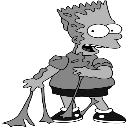

0


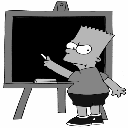

0


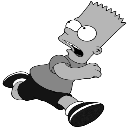

0


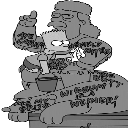

0


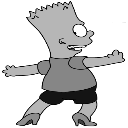

0


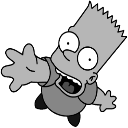

0


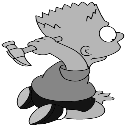

0


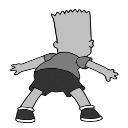

0


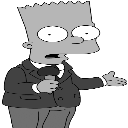

0


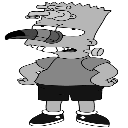

0


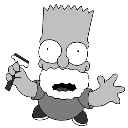

0


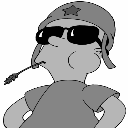

0


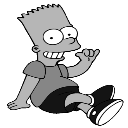

0


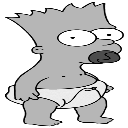

0


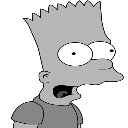

0


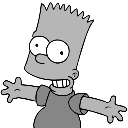

0


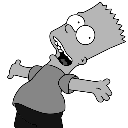

0


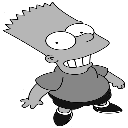

0


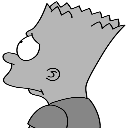

0


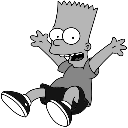

0


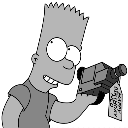

0


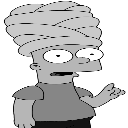

0


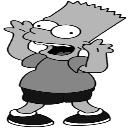

0


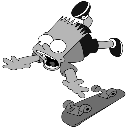

0


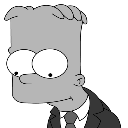

0


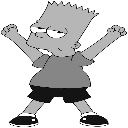

0


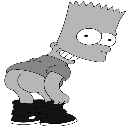

0


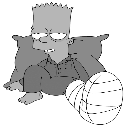

0


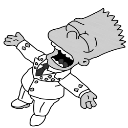

0


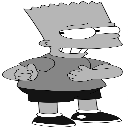

0


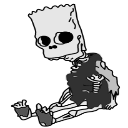

0


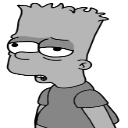

0


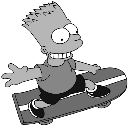

0


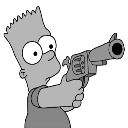

0


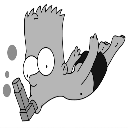

0


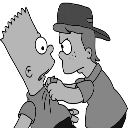

0


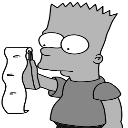

0


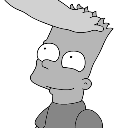

0


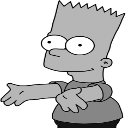

0


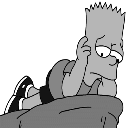

0


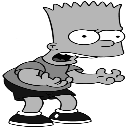

0


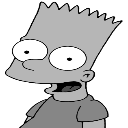

0


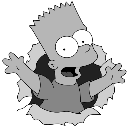

0


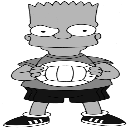

0


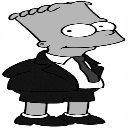

0


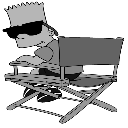

0


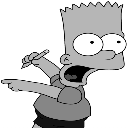

0


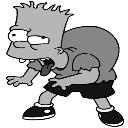

0


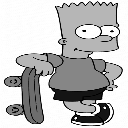

0


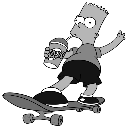

0


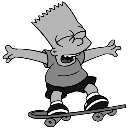

0


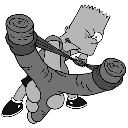

0


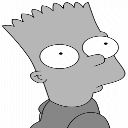

0


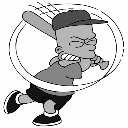

0


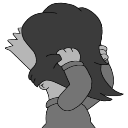

0


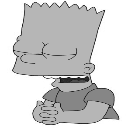

0


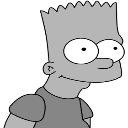

0


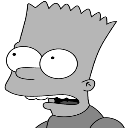

0


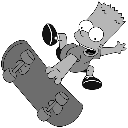

0


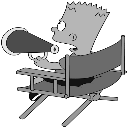

0


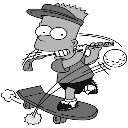

0


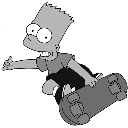

0


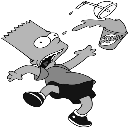

0


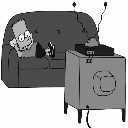

0


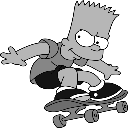

0


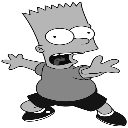

0


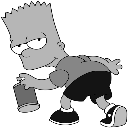

0


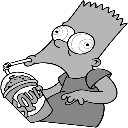

0


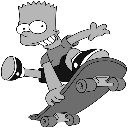

0


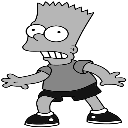

0


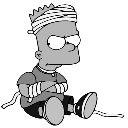

0


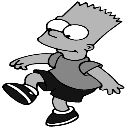

0


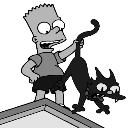

0


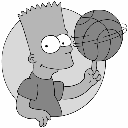

0


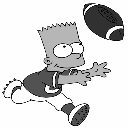

0


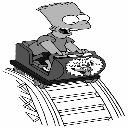

0


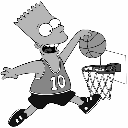

0


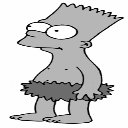

0


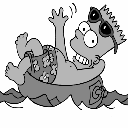

0


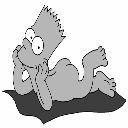

0


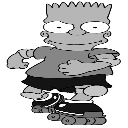

0


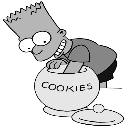

0


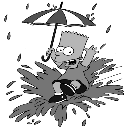

0


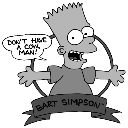

0


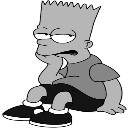

0


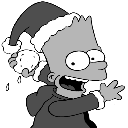

0


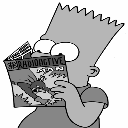

0


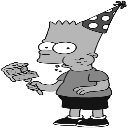

0


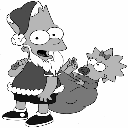

0


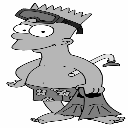

0


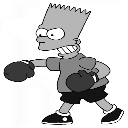

0


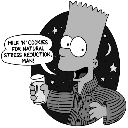

0


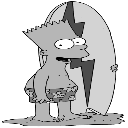

0


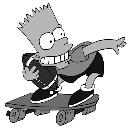

0


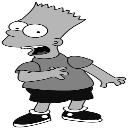

0


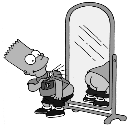

0


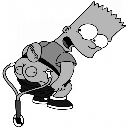

0


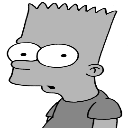

0


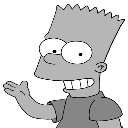

0


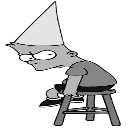

0


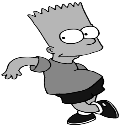

0


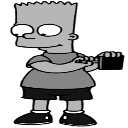

0


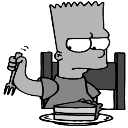

0


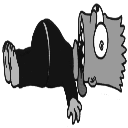

0


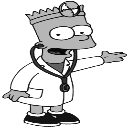

0


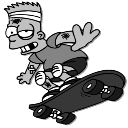

0


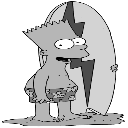

0


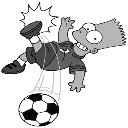

0


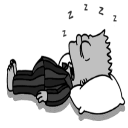

0


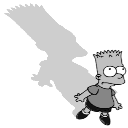

0


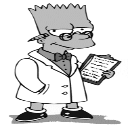

0


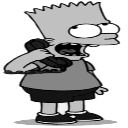

0


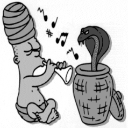

0


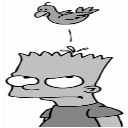

0


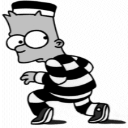

0


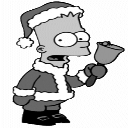

0


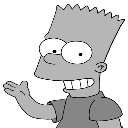

0


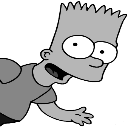

0


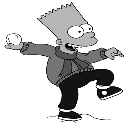

0


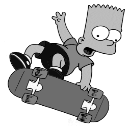

0


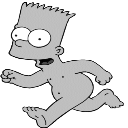

0


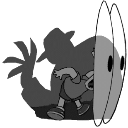

0


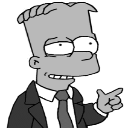

0


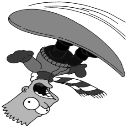

0


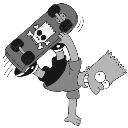

0


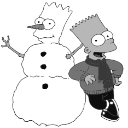

0


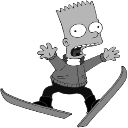

0


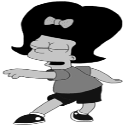

0


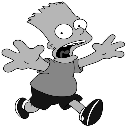

0


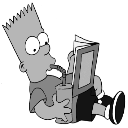

0


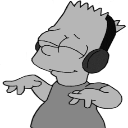

0


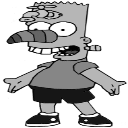

0


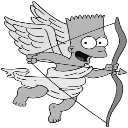

0


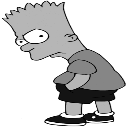

0


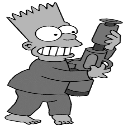

0


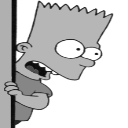

0


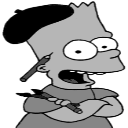

0


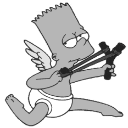

0


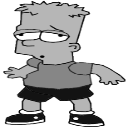

0


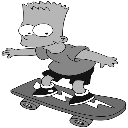

0


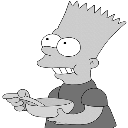

0


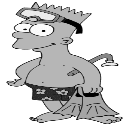

0


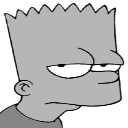

0


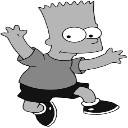

0


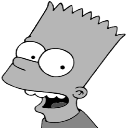

0


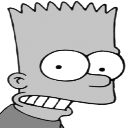

0


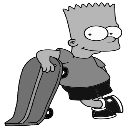

0


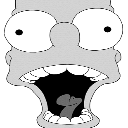

0


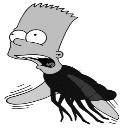

0


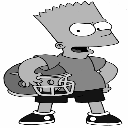

0


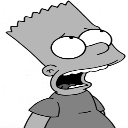

0


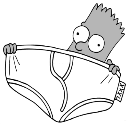

0


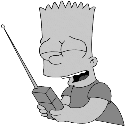

0


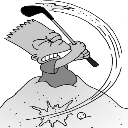

0


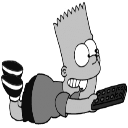

0


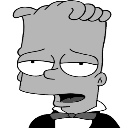

0


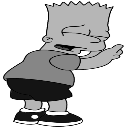

0


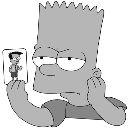

0


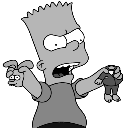

0


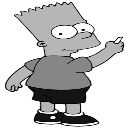

0


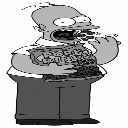

1


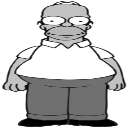

1


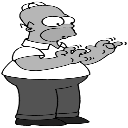

1


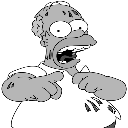

1


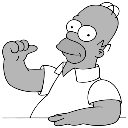

1


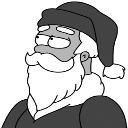

1


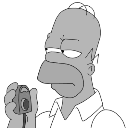

1


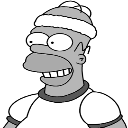

1


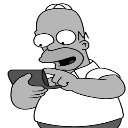

1


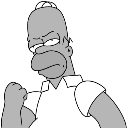

1


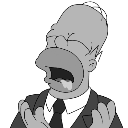

1


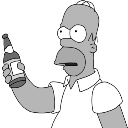

1


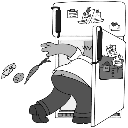

1


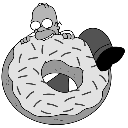

1


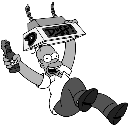

1


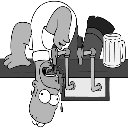

1


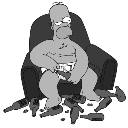

1


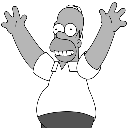

1


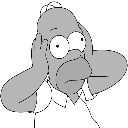

1


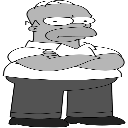

1


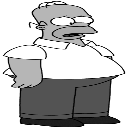

1


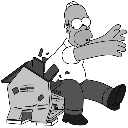

1


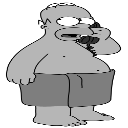

1


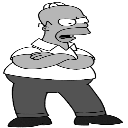

1


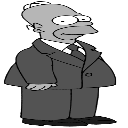

1


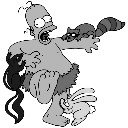

1


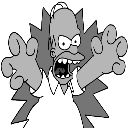

1


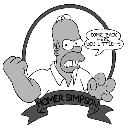

1


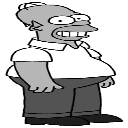

1


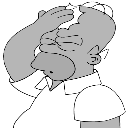

1


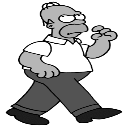

1


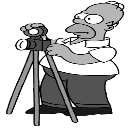

1


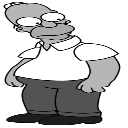

1


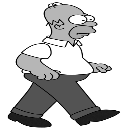

1


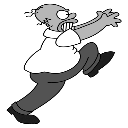

1


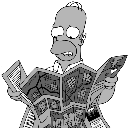

1


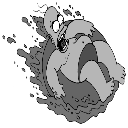

1


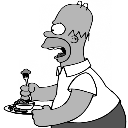

1


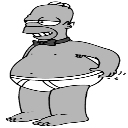

1


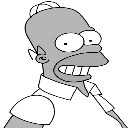

1


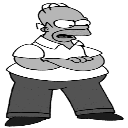

1


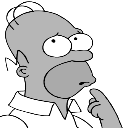

1


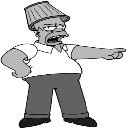

1


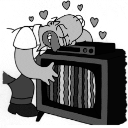

1


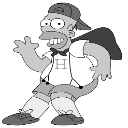

1


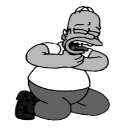

1


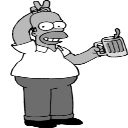

1


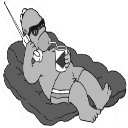

1


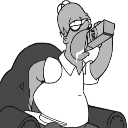

1


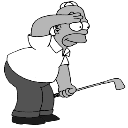

1


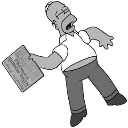

1


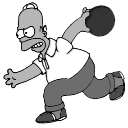

1


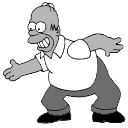

1


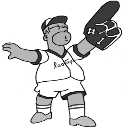

1


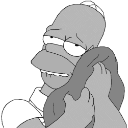

1


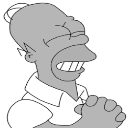

1


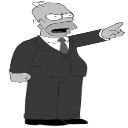

1


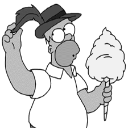

1


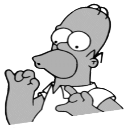

1


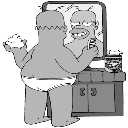

1


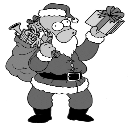

1


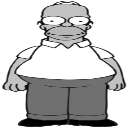

1


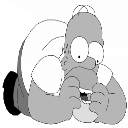

1


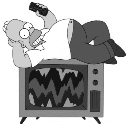

1


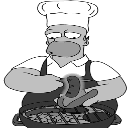

1


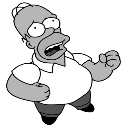

1


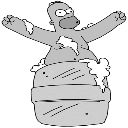

1


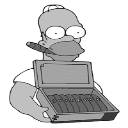

1


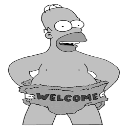

1


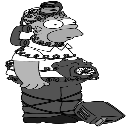

1


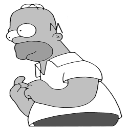

1


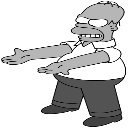

1


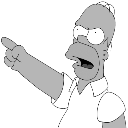

1


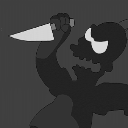

1


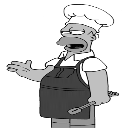

1


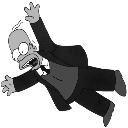

1


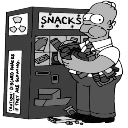

1


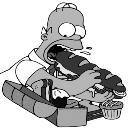

1


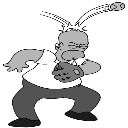

1


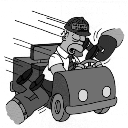

1


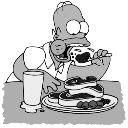

1


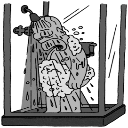

1


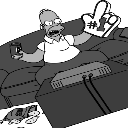

1


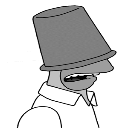

1


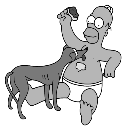

1


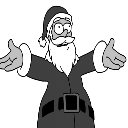

1


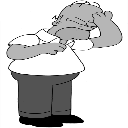

1


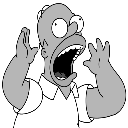

1


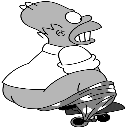

1


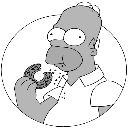

1


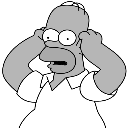

1


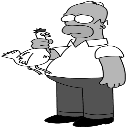

1


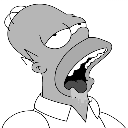

1


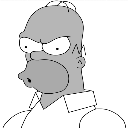

1


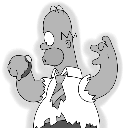

1


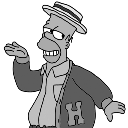

1


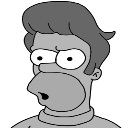

1


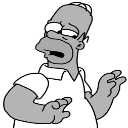

1


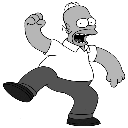

1


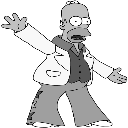

1


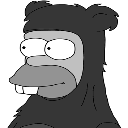

1


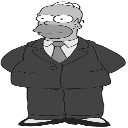

1


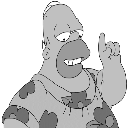

1


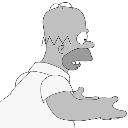

1


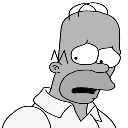

1


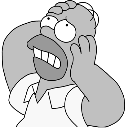

1


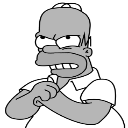

1


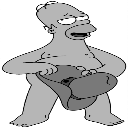

1


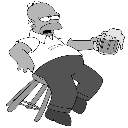

1


In [ ]:
for imagem_caminho in arquivos:
  #print(imagem)

  #tratamento de erro devido um arquivo corrompido no dataset
  try:
    imagem = cv2.imread(imagem_caminho)
    (H, W) = imagem.shape[:2]
  except:
    continue

  imagem = cv2.resize(imagem, (largura, altura)) #redimensionamento
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) #escala de cinza, colocando em 1 canal de cor
  cv2_imshow(imagem)
  #print(imagem.shape) #formato de matriz (128,128)

  imagem = imagem.ravel() #converter de matriz para vetor
  #print(imagem.shape)

  imagens.append(imagem)
  nome_imagem = os.path.basename(os.path.normpath(imagem_caminho)) #extrair o nome de cada arquivo
  if nome_imagem.startswith('b'):
    classe = 0 #0 para bart
  else:
    classe = 1 #1 para homer

  classes.append(classe)
  print(classe)

In [ ]:
imagens

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 128, 123, 124], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 2

In [ ]:
print(classes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
imagens[3], classes [3]

(array([255, 255, 255, ..., 128, 123, 124], dtype=uint8), 0)

In [ ]:
type(imagens), type(classes)

(list, list)

In [ ]:
# deve-se transformar para tipo numpay array
X = np.asarray(imagens)
y = np.asarray(classes)

type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X.shape

(269, 16384)

In [ ]:
y.shape

(269,)

In [ ]:
np.unique(y, return_counts = True)
#temos mais classes de uma imagem do que de outra.

(array([0, 1]), array([160, 109]))

## Normalizacao do Dados

In [ ]:
X[0].max(), X[0].min()
#valores muito distantes, logo a normalizacao eh um forma de reduzir os numeros e facilitar os calculos da RN

(255, 0)

In [ ]:
#normalizacao com MinMax com escala de 0 a 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X[0].max(), X[0].min()

(1.0000000000000002, 0.0)

## Split do dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape

((215, 16384), (215,))

In [ ]:
X_test.shape, y_test.shape

((54, 16384), (54,))

## Construcao e Treinamento da RN

In [ ]:
#camada de entrada
128*128

16384

In [ ]:
# primeira camada oculta
(128*128 + 2)/2

8193.0

In [ ]:
# 16384 -> 8193 -> 8193 -> 1
rn1 = tf.keras.models.Sequential() #sequencial por eh uma sequencia de camadas: entrada, escondidas e saida
rn1.add(tf.keras.layers.Dense(input_shape = (16384,), units = 8193, activation = 'relu')) #relu se o valor eh nagativo o valor sera 0 e valor positivo sera o proprio numero positivo.
rn1.add(tf.keras.layers.Dense(units = 8193, activation = 'relu'))
rn1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) #como eh uma classificacao sera apenas um neuronio de saida

In [ ]:
rn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rn1.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Os parametgros acima sao:
# - algoritmo de ajuste dos pesos
# - funcao do calculo do erro
# - metodo de avaliacao

In [ ]:
#fazer o treinamento
historico = rn1.fit(X_train,y_train, epochs = 50)

Epoch 1/50
7/7 [==============================] - 29s 4s/step - loss: 173.0127 - accuracy: 0.5581
Epoch 2/50
7/7 [==============================] - 27s 4s/step - loss: 15.3849 - accuracy: 0.4837
Epoch 3/50
7/7 [==============================] - 28s 4s/step - loss: 1.3515 - accuracy: 0.5581
Epoch 4/50
7/7 [==============================] - 27s 4s/step - loss: 0.7617 - accuracy: 0.5674
Epoch 5/50
7/7 [==============================] - 26s 4s/step - loss: 0.7526 - accuracy: 0.4930
Epoch 6/50
7/7 [==============================] - 26s 4s/step - loss: 0.6668 - accuracy: 0.6000
Epoch 7/50
7/7 [==============================] - 27s 4s/step - loss: 0.6551 - accuracy: 0.6465
Epoch 8/50
7/7 [==============================] - 26s 4s/step - loss: 0.6460 - accuracy: 0.6186
Epoch 9/50
7/7 [==============================] - 36s 5s/step - loss: 0.6056 - accuracy: 0.6884
Epoch 10/50
7/7 [==============================] - 27s 4s/step - loss: 0.5826 - accuracy: 0.6837
Epoch 11/50
7/7 [===================

## Avaliacao da RN

In [ ]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

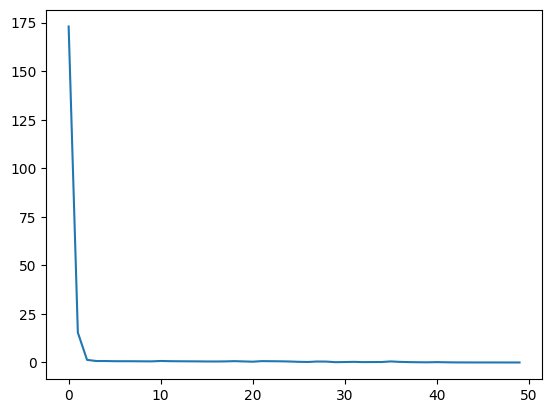

In [ ]:
# grafico da loss
plt.plot(historico.history['loss']);

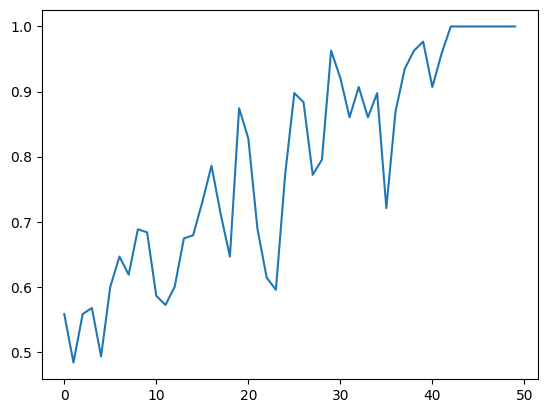

In [ ]:
# grafico da acuracia
plt.plot(historico.history['accuracy']);

In [ ]:
previsoes = rn1.predict(X_test)
previsoes

2/2 [==============================] - 2s 951ms/step


array([[8.83338749e-01],
       [1.17191365e-02],
       [6.78792298e-01],
       [4.07204218e-03],
       [9.73211944e-01],
       [8.82032931e-01],
       [9.98276472e-01],
       [6.26253290e-03],
       [9.78615344e-01],
       [9.87599015e-01],
       [9.96492088e-01],
       [7.12354004e-01],
       [1.82465906e-03],
       [2.27101101e-03],
       [8.88802826e-01],
       [9.92311418e-01],
       [9.98604238e-01],
       [1.39015123e-01],
       [6.21577799e-01],
       [9.53970551e-01],
       [8.65599141e-02],
       [8.16161871e-01],
       [8.34497958e-02],
       [1.35690509e-03],
       [9.68270702e-04],
       [5.10169484e-05],
       [3.21524963e-03],
       [8.68483722e-01],
       [8.85458112e-01],
       [9.97772932e-01],
       [5.02838612e-01],
       [2.29662731e-01],
       [5.55513846e-03],
       [9.89655316e-01],
       [9.94943440e-01],
       [8.53931829e-02],
       [3.35930660e-02],
       [5.69757707e-02],
       [3.22473655e-03],
       [6.11140788e-01],


In [ ]:
previsoes = (previsoes > 0.5) #threshold da funçao sigmoid
#sendo True == 1 e False == 0

In [ ]:
accuracy_score(y_test, previsoes)

0.7037037037037037

In [ ]:
cm = confusion_matrix(y_test, previsoes)
cm

array([[20, 11],
       [ 5, 18]])

<Axes: >

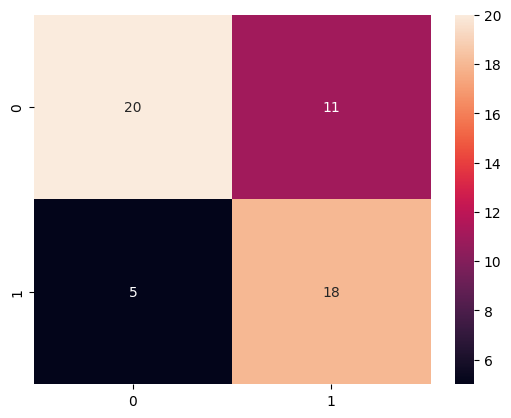

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.65      0.71        31
           1       0.62      0.78      0.69        23

    accuracy                           0.70        54
   macro avg       0.71      0.71      0.70        54
weighted avg       0.72      0.70      0.70        54



## Salvar e carregar a RN

In [ ]:
model_json = rn1.to_json()
with open('rn1.json', 'w') as json_file: #salvar a rede neural em formato json
  json_file.write(model_json)

In [ ]:
rn1_saved = save_model(rn1, 'weights1.hdf5') #salvar os pesos da rede

<ipython-input-44-2c3df4348840>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  rn1_saved = save_model(rn1, 'weights1.hdf5') #salvar os pesos da rede


In [ ]:
#arquitetura da rede
with open('rn1.json','r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 16384], "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 16384]}}, {"module": "keras.layers", "class_name": "Dense

In [ ]:
#carregando a rede neural ja treinada
rn1_loaded = tf.keras.models.model_from_json(json_saved_model)
rn1_loaded.load_weights('/content/weights1.hdf5')
rn1_loaded.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
rn1_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Classificando apenas uma imagem

In [ ]:
X_test[0], y_test[0]

(array([1., 1., 1., ..., 1., 1., 1.]), 0)

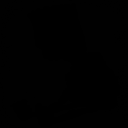

In [ ]:
cv2_imshow(X_test[0].reshape(128,128)) #carregar uma imagem da base de teste e ja transofmrar para matriz com o reshape

In [ ]:
imagem_test = X_test[34]
imagem_test = scaler.inverse_transform(imagem_test.reshape(1,-1)) #desrnomalização da imagem para trazer os valores dos pixels originais

In [ ]:
imagem_test

array([[255., 255., 255., ...,  28., 255., 255.]])

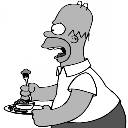

In [ ]:
cv2_imshow(imagem_test.reshape(128,128))

In [ ]:
rn1_loaded.predict(imagem_test)[0][0]

1/1 [==============================] - 0s 134ms/step


1.0

In [ ]:
if rn1_loaded.predict(imagem_test)[0][0] < 0.5: #acessar a probabilidade da previsao da RN
  print('Bart')
else:
  print('Homer')

1/1 [==============================] - 0s 290ms/step
Homer


## Abordagem 2 para classificação

> Outra abordagem é entender as caracteristicas de cada um e extrair as cores por exemplo.

> A ideia eh extrair infos de cores presentes para cada personagem como na boca do homer, na calca do homer e os sapatos do homer alem de na camisa do bart, na calca do bart e nos tenis do bart.

> O arquivo tera 7 colunas para descrever cada imagem, as 3 primeiras sera as coress do bart, as 3 proximas sserao sa cores do homer (cores dos locais citados acima) e a ultima coluna eh a label.

### Extrator de caracteristicas

In [ ]:
arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))]

In [ ]:
arquivos

['/content/homer_bart_1/.DS_Store',
 '/content/homer_bart_1/bart1.bmp',
 '/content/homer_bart_1/bart10.bmp',
 '/content/homer_bart_1/bart100.bmp',
 '/content/homer_bart_1/bart101.bmp',
 '/content/homer_bart_1/bart102.bmp',
 '/content/homer_bart_1/bart103.bmp',
 '/content/homer_bart_1/bart104.bmp',
 '/content/homer_bart_1/bart105.bmp',
 '/content/homer_bart_1/bart106.bmp',
 '/content/homer_bart_1/bart108.bmp',
 '/content/homer_bart_1/bart109.bmp',
 '/content/homer_bart_1/bart11.bmp',
 '/content/homer_bart_1/bart110.bmp',
 '/content/homer_bart_1/bart111.bmp',
 '/content/homer_bart_1/bart112.bmp',
 '/content/homer_bart_1/bart113.bmp',
 '/content/homer_bart_1/bart114.bmp',
 '/content/homer_bart_1/bart115.bmp',
 '/content/homer_bart_1/bart116.bmp',
 '/content/homer_bart_1/bart117.bmp',
 '/content/homer_bart_1/bart118.bmp',
 '/content/homer_bart_1/bart119.bmp',
 '/content/homer_bart_1/bart12.bmp',
 '/content/homer_bart_1/bart120.bmp',
 '/content/homer_bart_1/bart121.bmp',
 '/content/homer_ba

In [ ]:
export = 'boca,calca,sapatos,camisa,bermuda,tenis,classe\n' #criando as colunas

In [ ]:
mostrar_imagens = False
caract = []

In [ ]:
for imagem_caminho in arquivos:
  try:
    imagem_original = cv2.imread(imagem_caminho)
    (H,W) = imagem_original.shape[:2]
  except:
    continue

#nessa abordagem como estamos olhando para porpocao de pixels e suas cores nao eh
#necessario dar o resize nas imagens, nem mesmo passar para a escala de cinza

  imagem_alterada = imagem_original.copy() #para visualizacao de alteracao do pixels
  imagem_caract = [] #armazena os valores do pixels de cada imagem
  imagem_nome = os.path.basename(os.path.normpath(imagem_caminho))
  boca = calca = sapato = 0
  camisa = bermuda = tenis  = 0

  if imagem_nome.startswith('b'):
    classe = 0
  else:
    classe = 1

#percorrer os pixels
  for altura in range(0,H):
    for largura in range(0,W):
      #RGB -> BGR
      azul = imagem_alterada.item(altura, largura, 0) #canal 1
      verde = imagem_alterada.item(altura, largura, 1) #canal 2
      vermelho = imagem_alterada.item(altura, largura, 2) #canal 3


#--------------------------------------------------------
      #Homer - boca - cor marrom
      #eh preciso olhar algumas imagens para entender os limites do codigo RGB/BGR para a cor escolhida
      if (azul >= 95 and azul <= 140 and verde >= 160 and verde <= 185 and vermelho >= 175 and vermelho <= 205):
        imagem_alterada[altura,largura] = [255,0,255] #recebe uma nova cor
        boca += 1

      #Homer - calca - cor azul
      #eh preciso olhar algumas imagens para entender os limites do codigo RGB/BGR para a cor escolhida
      if (azul >= 150 and azul <= 180 and verde >= 98 and verde <= 120 and vermelho >= 0 and vermelho <= 90):
        imagem_alterada[altura,largura] = [255,0,255] #recebe uma nova cor
        calca += 1

      #Homer - sapatos- cor cinza
      #eh preciso olhar algumas imagens para entender os limites do codigo RGB/BGR para a cor escolhida
      if altura > (H/2): #sempre pegando da metade para baixo da imagem.
        if (azul >= 25 and azul <= 45 and verde >= 25 and verde <= 45 and vermelho >= 25 and vermelho <= 45):
          imagem_alterada[altura,largura] = [255,0,255] #recebe uma nova cor
          sapato += 1
#--------------------------------------------------------
#--------------------------------------------------------
      #Bart - camisa - cor laranja
      #eh preciso olhar algumas imagens para entender os limites do codigo RGB/BGR para a cor escolhida
      if (azul >= 11 and azul <= 50 and verde >= 85 and verde <= 105 and vermelho >= 240 and vermelho <= 255):
        imagem_alterada[altura,largura] = [0,255,128] #recebe uma nova cor
        camisa += 1

      #Bart - bermuda - cor azul
      #eh preciso olhar algumas imagens para entender os limites do codigo RGB/BGR para a cor escolhida
      if (azul >= 125 and azul <= 170 and verde >= 0 and verde <= 12 and vermelho >= 0 and vermelho <= 20):
        imagem_alterada[altura,largura] = [0,255,128] #recebe uma nova cor
        bermuda += 1

      #Bart - tenis - cor azul
      #eh preciso olhar algumas imagens para entender os limites do codigo RGB/BGR para a cor escolhida
      if altura > (H/2):
        if (azul >= 125 and azul <= 170 and verde >= 0 and verde <= 12 and vermelho >= 0 and vermelho <= 20):
          imagem_alterada[altura,largura] = [0,255,128] #recebe uma nova cor
          tenis += 1
#--------------------------------------------------------


  boca = round((boca / (H*W) *100),9) #porcentagem de quantos pixels atendem a cor da boca com 9 casas decimais
  calca = round((calca / (H*W) *100),9)
  sapato = round((sapato / (H*W) *100),9)
  camisa = round((camisa / (H*W) *100),9)
  bermuda = round((bermuda / (H*W) *100),9)
  tenis = round((tenis / (H*W) *100),9)


  imagem_caract.append(boca) #add valores das porcetagens da boca
  imagem_caract.append(calca) #add valores das porcetagens da calca
  imagem_caract.append(sapato) #add valores das porcetagens da sapato
  imagem_caract.append(camisa) #add valores das porcetagens da camisa
  imagem_caract.append(bermuda) #add valores das porcetagens da bermuda
  imagem_caract.append(tenis) #add valores das porcetagens da tenis
  imagem_caract.append(classe) #add valores dos labels

  caract.append(imagem_caract) #salva as caracterisiticas de todas as imagens

  #print('Homer  boca: ', imagem_caract[0], ' - Homer calca: ', imagem_caract[1], ' - Homer sapato: ', imagem_caract[2])
  #print('Bart camisa: ', imagem_caract[3], ' - Bart bermuda: ', imagem_caract[4], ' - Bart tenis: ', imagem_caract[5])

  f = (','.join([str(item) for item in imagem_caract])) #unir os elementos da lista com um virgula seprando cada um deles
  export += f  + '\n'

  #mostrar a comparacao das imagens
  if mostrar_imagens == True:
    imagem_alterada = cv2.cvtColor(imagem_alterada, cv2.COLOR_BGR2RGB)
    imagem_original = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB)
    figura, im = plt.subplots(1,2)
    im[0].imshow(imagem_original)
    im[0].axis('off')
    im[1].imshow(imagem_alterada)
    im[1].axis('off')
    plt.show()

In [ ]:
export

'boca,calca,sapatos,camisa,bermuda,tenis,classe\n0.0,0.0,0.114799225,6.886101887,3.495204355,3.495204355,0\n0.0,0.0,0.11007847,5.004901113,3.183888705,3.183888705,0\n0.0,0.0,0.182518631,5.264620437,5.029682961,5.029682961,0\n0.0,0.480168257,0.080028043,0.0,0.0,0.0,0\n0.0,0.0,0.029707562,8.978929368,3.459119497,3.459119497,0\n0.0,0.0,0.053304904,6.75432362,0.948827292,0.948827292,0\n0.249585206,0.0,0.019853369,9.693407263,4.104683977,4.104683977,0\n0.0,0.0,0.181208054,0.0,0.0,0.0,0\n0.0,0.0,0.148868778,0.0,0.0,0.0,0\n0.0,0.0,0.114762211,9.594752524,7.522715548,7.522715548,0\n0.0,0.0,0.138655462,0.0,0.0,0.0,0\n0.0,0.0,0.02400947,19.545383481,0.0,0.0,0\n0.00307645,0.0,0.0,6.495154592,5.599138594,5.599138594,0\n0.001317263,0.0,0.087817515,0.0,0.0,0.0,0\n0.0,0.0,0.032184591,8.395721925,0.0,0.0,0\n0.02105732,0.0,0.008503918,8.915750471,0.0,0.0,0\n0.0,0.0,0.081055114,11.095816228,4.525111363,4.525111363,0\n0.0,0.0,0.08757526,10.493254773,3.183296307,3.183296307,0\n0.0,0.0,0.043806812,9.563574

In [ ]:
with open('features.csv', 'w') as file: #salvando em um formato csv
  for linha in export:
    file.write(linha)
file.closed

True

In [ ]:
dataset = pd.read_csv('features.csv') #leitura e atribuicao a uma variavel
dataset

,boca,calca,sapatos,camisa,bermuda,tenis,classe
0,0.000000,0.000000,0.114799,6.886102,3.495204,3.495204,0
1,0.000000,0.000000,0.110078,5.004901,3.183889,3.183889,0
2,0.000000,0.000000,0.182519,5.264620,5.029683,5.029683,0
3,0.000000,0.480168,0.080028,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.029708,8.978929,3.459119,3.459119,0
...,...,...,...,...,...,...,...
264,6.485412,0.000000,0.171985,0.000000,0.000000,0.000000,1
265,0.000000,0.000000,0.161637,0.000000,0.000000,0.000000,1
266,4.264975,0.000000,0.329940,0.000000,0.000000,0.000000,1
267,1.429133,0.000000,0.034559,0.000000,0.000000,0.000000,1


### Split

In [ ]:
X = dataset.iloc[:,0:6].values #todas as linhas e as 6 primeiras colunas
y = dataset.iloc[:,6].values #apenas a ultima coluna

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape

((215, 6), (215,))

In [ ]:
X_test.shape, y_test.shape

((54, 6), (54,))

> percebe-se que agora a rede sera muito menor, uma vez que antes eram 16mil dados de entrada e agora serao apenas 6.

### Contrucao e treinamento da RN

In [ ]:
#camada oculto
 (6+2)/2

4.0

In [ ]:
# 6 neuronios de entrada -> 4 neuronios na 1 camada oculta ->  4 neuronios na 2 camada oculta -> 4 neuronios na 3 camada oculta
rn2 = tf.keras.Sequential()
rn2.add(tf.keras.layers.Dense(input_shape  = (6,), units = 4, activation = 'relu'))
rn2.add(tf.keras.layers.Dense(units = 4, activation = 'relu')) #segunda camada oculta
rn2.add(tf.keras.layers.Dense(units = 4, activation = 'relu')) #terceira camada oculta
rn2.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
rn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rn2.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
historico = rn2.fit(X_train, y_train, epochs = 500)

Epoch 1/500
7/7 [==============================] - 2s 6ms/step - loss: 0.7297 - accuracy: 0.5767
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7203 - accuracy: 0.6000
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7103 - accuracy: 0.6000
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7029 - accuracy: 0.6000
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.6000
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.6837
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6817 - accuracy: 0.7256
Epoch 8/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6761 - accuracy: 0.7256
Epoch 9/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6705 - accuracy: 0.7256
Epoch 10/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6654 - accuracy: 0.7256
Epoch 11/500
7/7 [===========

### Avaliacao

In [ ]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

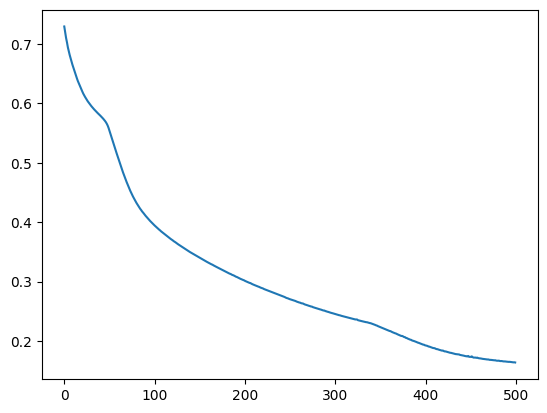

In [ ]:
plt.plot(historico.history['loss']);

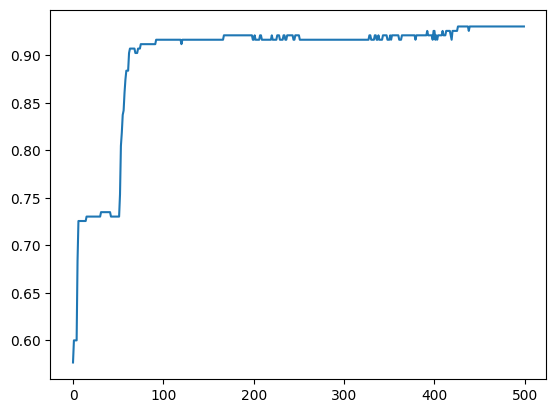

In [ ]:
plt.plot(historico.history['accuracy']);

In [ ]:
previsoes = rn2(X_test) #probabiliades para o teste

In [ ]:
previsoes = previsoes > 0.5
previsoes

#tranformacao para True e False
#True = 1 = Homer
#False = 0 = Bart

<tf.Tensor: shape=(54, 1), dtype=bool, numpy=
array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True]])>

In [ ]:
accuracy_score(y_test, previsoes)

0.9074074074074074

In [ ]:
cm = confusion_matrix(y_test, previsoes)
cm

array([[30,  1],
       [ 4, 19]])

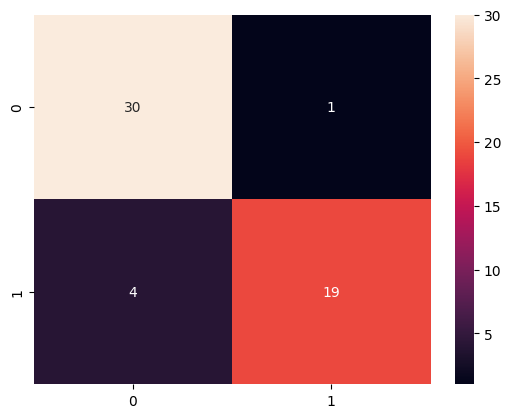

In [ ]:
sns.heatmap(cm, annot = True);

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.95      0.83      0.88        23

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



> Report da rede mais complexa:

>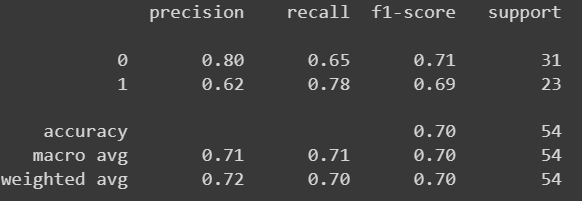

### Salvar e carregar a RN

In [ ]:
model_json = rn2.to_json()
with open('rn2.json', 'w') as json_file: #salvar a rede neural em formato json
  json_file.write(model_json)

In [ ]:
rn2_saved = save_model(rn2, 'weights2.hdf5') #salvar os pesos da rede

<ipython-input-88-6d698c0264e4>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  rn2_saved = save_model(rn2, 'weights2.hdf5') #salvar os pesos da rede


In [ ]:
#arquitetura da rede
with open('rn2.json','r') as json_file:
  json_saved_model = json_file.read() #carrega a rede
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 6], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_4_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 6], "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 6]}}, {"module": "keras.layers", "class_name": "Dense", "confi

In [ ]:
#carregando a rede neural ja treinada
rn2_loaded = tf.keras.models.model_from_json(json_saved_model)
rn2_loaded.load_weights('/content/weights2.hdf5')
rn2_loaded.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
  rn2_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#carregar uma imagem de tesste singular

imagem_teste = X_test[0]
imagem_teste

array([0.        , 0.        , 0.37940379, 0.        , 0.        ,
       0.        ])

In [ ]:
imagem_teste.shape #formato vetor

(6,)

In [ ]:
imagem_teste = imagem_teste.reshape(1,-1) #formato matriz
imagem_teste.shape

(1, 6)

In [ ]:
#probbilidade da previsao
rn2_loaded.predict(imagem_teste)[0][0]

1/1 [==============================] - 0s 297ms/step


0.32479414

In [ ]:
if rn2_loaded.predict(imagem_teste)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 [==============================] - 0s 37ms/step
Bart


## Teste com outro dataset

> Clssificacao de animais -> caes e gatos

### Carregar o dataset

In [ ]:
# puxando o dataset
path = '/content/drive/MyDrive/Visão Computacional Guia Completo/Datasets/cat_dog_1.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r') #r indica a leitura read
zip_object.extractall('./')
zip_object.close() #liberar memoria

In [ ]:
diretorio_train = '/content/cat_dog_1/train'
diretorio_test = '/content/cat_dog_1/test'
arquivos_train = [os.path.join(diretorio_train, f) for f in sorted(os.listdir(diretorio_train))]
arquivos_test = [os.path.join(diretorio_test, f) for f in sorted(os.listdir(diretorio_test))]

In [ ]:
altura, largura = 128,128

### Treino

In [ ]:
imagens = []
classes = []

for imagem_caminho in arquivos_train:
  #tratamento de erro devido um arquivo corrompido no dataset
  try:
    imagem = cv2.imread(imagem_caminho)
    (H, W) = imagem.shape[:2]
  except:
    continue

  imagem = cv2.resize(imagem, (largura, altura)) #redimensionamento
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) #escala de cinza, colocando em 1 canal de cor
  #cv2_imshow(imagem)
  #print(imagem.shape) #formato de matriz (128,128)

  imagem = imagem.ravel() #converter de matriz para vetor
  #print(imagem.shape)

  imagens.append(imagem)

  nome_imagem = os.path.basename(os.path.normpath(imagem_caminho)) #extrair o nome de cada arquivo
  if nome_imagem.startswith('c'):
    classe = 0 #0 para gato
  else:
    classe = 1 #1 para cachorro

  classes.append(classe)
  #print(classe)

In [ ]:
X_train = np.asarray(imagens)
y_train = np.asarray(classes)

In [ ]:
X_train.shape

(4000, 16384)

In [ ]:
y_train.shape

(4000,)

### Teste

In [ ]:
imagens = []
classes = []

for imagem_caminho in arquivos_test:
  #tratamento de erro devido um arquivo corrompido no dataset
  try:
    imagem = cv2.imread(imagem_caminho)
    (H, W) = imagem.shape[:2]
  except:
    continue

  imagem = cv2.resize(imagem, (largura, altura)) #redimensionamento
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) #escala de cinza, colocando em 1 canal de cor
  #cv2_imshow(imagem)
  #print(imagem.shape) #formato de matriz (128,128)

  imagem = imagem.ravel() #converter de matriz para vetor
  #print(imagem.shape)

  imagens.append(imagem)

  nome_imagem = os.path.basename(os.path.normpath(imagem_caminho)) #extrair o nome de cada arquivo
  if nome_imagem.startswith('c'):
    classe = 0 #0 para gato
  else:
    classe = 1 #1 para cachorro

  classes.append(classe)
  #print(classe)

In [ ]:
X_test = np.asarray(imagens)
y_test = np.asarray(classes)

In [ ]:
X_test.shape

(1000, 16384)

In [ ]:
y_test.shape

(1000,)

### Normalizacao

In [ ]:
X_train[0].max(), X_train[0].min()

(236, 1)

In [ ]:
#Min Max para normalizar
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_test[0].max(), X_test[0].min()

(1.0, -0.003937007874015748)

In [ ]:
X_train[0].max(), X_train[0].min()

(0.9254901960784314, 0.0)

### Criar a RN

In [ ]:
#camada oculta
(16384+2)/2

8193.0

In [ ]:
128*128

16384

In [ ]:
#16384 -> 8193 -> 8193 -> 1
rn3 = tf.keras.models.Sequential() #sequencial por eh uma sequencia de camadas: entrada, escondidas e saida
rn3.add(tf.keras.layers.Dense(input_shape = (16384,), units = 8193, activation = 'relu')) #relu se o valor eh nagativo o valor sera 0 e valor positivo sera o proprio numero positivo.
rn3.add(tf.keras.layers.Dense(units = 8193, activation = 'relu'))
rn3.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
rn3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8193)              134242305 
                                                                 
 dense_12 (Dense)            (None, 8193)              67133442  
                                                                 
 dense_13 (Dense)            (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rn3.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
historico = rn3.fit(X_train, y_train, epochs = 1) #demora muito devido tamanho do dataset

125/125 [==============================] - 689s 6s/step - loss: 1.7520 - accuracy: 0.5013


### Avaliacao

In [ ]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
previsoes = rn3.predict(X_test)

32/32 [==============================] - 21s 644ms/step


In [ ]:
previsoes = (previsoes > 0.5) #conversao para True e False

In [ ]:
accuracy_score(y_test, previsoes)

0.511

In [ ]:
cm = confusion_matrix(y_test, previsoes)

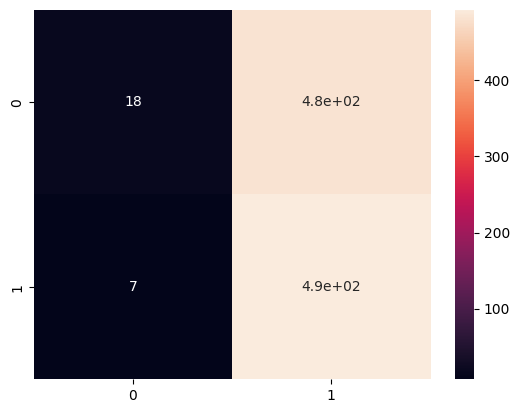

In [ ]:
sns.heatmap(cm, annot = True);

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.72      0.04      0.07       500
           1       0.51      0.99      0.67       500

    accuracy                           0.51      1000
   macro avg       0.61      0.51      0.37      1000
weighted avg       0.61      0.51      0.37      1000



> mais treinamento melhoraria muito os resultados, entretanto pelo tempo de execucao foi feito apenas uma epoca